In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import imdb 
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Model
from tensorflow import keras

from tensorflow.keras.layers import Input, Embedding, Dense, Flatten 
from tensorflow.keras.layers import LSTM, Dropout, SimpleRNN, Bidirectional

from sklearn import metrics
import pandas as pd

In [2]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import spacy as sp
import string
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
np.random.seed(123)
tf.random.set_seed(123)

In [4]:
import os
import glob


In [5]:
os.chdir(r"C:\Users\sindh\Downloads\op_spam_v1.4\op_spam_v1.4\positive_polarity\deceptive_from_MTurk\fold1")

In [6]:
filenames = [i for i in glob.glob("*.txt")]

In [7]:
filenames

['d_affinia_1.txt',
 'd_affinia_10.txt',
 'd_affinia_11.txt',
 'd_affinia_12.txt',
 'd_affinia_13.txt',
 'd_affinia_14.txt',
 'd_affinia_15.txt',
 'd_affinia_16.txt',
 'd_affinia_17.txt',
 'd_affinia_18.txt',
 'd_affinia_19.txt',
 'd_affinia_2.txt',
 'd_affinia_20.txt',
 'd_affinia_3.txt',
 'd_affinia_4.txt',
 'd_affinia_5.txt',
 'd_affinia_6.txt',
 'd_affinia_7.txt',
 'd_affinia_8.txt',
 'd_affinia_9.txt',
 'd_allegro_1.txt',
 'd_allegro_10.txt',
 'd_allegro_11.txt',
 'd_allegro_12.txt',
 'd_allegro_13.txt',
 'd_allegro_14.txt',
 'd_allegro_15.txt',
 'd_allegro_16.txt',
 'd_allegro_17.txt',
 'd_allegro_18.txt',
 'd_allegro_19.txt',
 'd_allegro_2.txt',
 'd_allegro_20.txt',
 'd_allegro_3.txt',
 'd_allegro_4.txt',
 'd_allegro_5.txt',
 'd_allegro_6.txt',
 'd_allegro_7.txt',
 'd_allegro_8.txt',
 'd_allegro_9.txt',
 'd_amalfi_1.txt',
 'd_amalfi_10.txt',
 'd_amalfi_11.txt',
 'd_amalfi_12.txt',
 'd_amalfi_13.txt',
 'd_amalfi_14.txt',
 'd_amalfi_15.txt',
 'd_amalfi_16.txt',
 'd_amalfi_17.txt',

In [8]:
Positive = pd.DataFrame({'reviews':[pd.read_csv(file, header=None,delimiter = "\t")[0][0] for file in filenames]})

In [9]:
Positive['Sentiment']=1

In [10]:
Positive

,reviews,Sentiment
0,"After recent week stay at the Affinia Hotels, ...",1
1,"Although much too overpriced in my opinion, th...",1
2,The Affinia hotel in Chicago was superb. the r...,1
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,1
4,The Affinia Chicago is a wonderful place to st...,1
...,...,...
395,The rates at The Talbott Hotel were cheaper th...,1
396,I enjoyed my stay at the Talbott Hotel. It is ...,1
397,Pleasant staff and housekeeping. Above average...,1
398,My stay at this hotel was one of the best I ha...,1


In [11]:
os.chdir(r"C:\Users\sindh\Downloads\op_spam_v1.4\op_spam_v1.4\negative_polarity\deceptive_from_MTurk\fold1")

In [12]:
Negative = pd.DataFrame({'reviews':[pd.read_csv(file, header=None,delimiter = "\t")[0][0] for file in filenames]})

In [13]:
Negative['Sentiment']=0

In [14]:
Negative

,reviews,Sentiment
0,Affinia Chicago is one of the worst hotels I h...,0
1,I recently stayed at the Affina Chicago hotel ...,0
2,I stayed at the Affina Chicago for my annivers...,0
3,If you are looking for a high end hotel on the...,0
4,I just returned from a long weekend in Chicago...,0
...,...,...
395,My husband and I were planning our 1st year we...,0
396,I recently stayed at The Talbott Hotel for 3 n...,0
397,"I'd expect a ""luxury"" hotel to pay more attent...",0
398,I selected The Talbott for my recent family va...,0


In [15]:
frames = [Positive,Negative]

In [75]:
DataFrame_main = pd.concat(frames)

In [76]:
DataFrame_main

,reviews,Sentiment
0,"After recent week stay at the Affinia Hotels, ...",1
1,"Although much too overpriced in my opinion, th...",1
2,The Affinia hotel in Chicago was superb. the r...,1
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,1
4,The Affinia Chicago is a wonderful place to st...,1
...,...,...
395,My husband and I were planning our 1st year we...,0
396,I recently stayed at The Talbott Hotel for 3 n...,0
397,"I'd expect a ""luxury"" hotel to pay more attent...",0
398,I selected The Talbott for my recent family va...,0


In [18]:
#positive_words = DataFrame_main[DataFrame_main['reviews'] == 1]
#negative_words = DataFrame_main[DataFrame_main['reviews'] == 0]

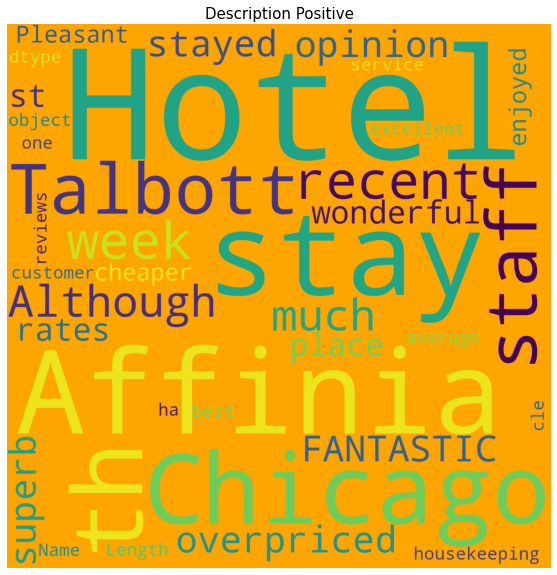

In [20]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')
wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(Positive['reviews']))
plt.title('Description Positive', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

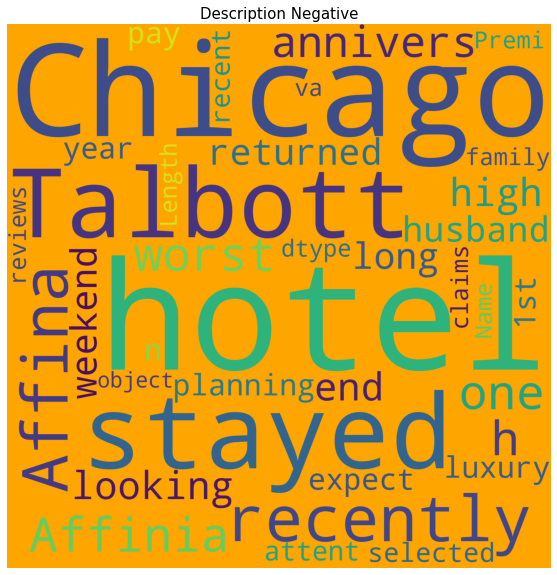

In [21]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')
wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(Negative['reviews']))
plt.title('Description Negative', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [57]:
real_disaster=np.array(Positive['reviews'])
not_real_disaster=np.array(Negative['reviews'])

In [58]:
real_disaster[5]

'The magnificent mile in Chicago is a great place to visit, and staying at the Affinia Chicago just made it that much better! The location is awesome - all of the great shopping spots were just moments away, and getting to Navy Pier was a cinch! And the accommodations themselves were wonderful! The hotel lets you completely customize your stay, all the way down to choosing your own pillow! Very impressed overall!'

In [59]:
from collections import Counter

In [60]:
real_counts = Counter()
not_real_counts = Counter()
total_counts = Counter()

In [61]:
for tweet in real_disaster:
    for word in tweet.split(" "):
        real_counts[word] +=1
        total_counts[word] +=1
    
for tweet in not_real_disaster:
    for word in tweet.split(" "):
        not_real_counts[word] +=1
        total_counts[word] +=1     

In [62]:
real_counts.most_common()

[('the', 2425),
 ('and', 1795),
 ('I', 1345),
 ('to', 1272),
 ('a', 1215),
 ('was', 1153),
 ('The', 806),
 ('in', 759),
 ('of', 693),
 ('hotel', 512),
 ('is', 511),
 ('at', 488),
 ('my', 480),
 ('for', 460),
 ('with', 369),
 ('Chicago', 367),
 ('were', 323),
 ('room', 316),
 ('we', 316),
 ('very', 311),
 ('that', 288),
 ('stay', 286),
 ('had', 271),
 ('it', 261),
 ('have', 254),
 ('this', 247),
 ('you', 232),
 ('our', 226),
 ('as', 211),
 ('are', 210),
 ('great', 203),
 ('staff', 190),
 ('on', 187),
 ('Hotel', 184),
 ('from', 184),
 ('We', 179),
 ('all', 169),
 ('My', 168),
 ('so', 166),
 ('would', 165),
 ('stayed', 159),
 ('be', 148),
 ('will', 147),
 ('rooms', 143),
 ('', 136),
 ('service', 134),
 ('they', 127),
 ('like', 123),
 ('but', 122),
 ('It', 120),
 ('there', 120),
 ('an', 120),
 ('me', 117),
 ('time', 117),
 ('recommend', 112),
 ('Chicago.', 112),
 ('definitely', 111),
 ('one', 110),
 ('This', 109),
 ('just', 106),
 ('which', 104),
 ('not', 100),
 ('business', 100),
 ('by', 

In [63]:
not_real_counts.most_common()

[('the', 3871),
 ('I', 2310),
 ('to', 2237),
 ('and', 2033),
 ('was', 1919),
 ('a', 1722),
 ('in', 1047),
 ('of', 985),
 ('for', 779),
 ('The', 744),
 ('my', 737),
 ('at', 714),
 ('that', 705),
 ('not', 692),
 ('room', 683),
 ('we', 681),
 ('it', 626),
 ('had', 617),
 ('hotel', 580),
 ('were', 514),
 ('but', 484),
 ('with', 456),
 ('on', 450),
 ('be', 425),
 ('our', 409),
 ('they', 376),
 ('is', 356),
 ('this', 355),
 ('have', 322),
 ('would', 297),
 ('Chicago', 289),
 ('as', 287),
 ('stay', 279),
 ('there', 276),
 ('me', 254),
 ('very', 237),
 ('We', 230),
 ('when', 229),
 ('from', 208),
 ('so', 207),
 ('you', 206),
 ('up', 205),
 ('like', 198),
 ('an', 194),
 ('service', 189),
 ('did', 186),
 ('get', 183),
 ('all', 182),
 ('no', 179),
 ('When', 179),
 ('one', 177),
 ('out', 174),
 ('desk', 166),
 ('about', 166),
 ('could', 160),
 ('Hotel', 160),
 ('staff', 154),
 ('stayed', 149),
 ('will', 149),
 ('been', 147),
 ('or', 146),
 ('front', 144),
 ('their', 140),
 ('are', 138),
 ('only', 

In [64]:
ratio_counter=Counter()

for word,count in total_counts.most_common():
    if count>10:
        ratio_counter[word]=real_counts[word]/float(not_real_counts[word]+1)

for word,ratio in ratio_counter.most_common():
    if ratio>1:
        ratio_counter[word]=np.log(ratio)
    else:
        ratio_counter[word]=-np.log(1/(ratio+0.001))

In [65]:
ratio_counter.most_common()

[('', 4.912654885736052),
 ('enjoyed', 3.624340932976365),
 ('loved', 3.3843902633457743),
 ('amazing.', 3.1354942159291497),
 ('Great', 2.5649493574615367),
 ('Lake', 2.5649493574615367),
 ('fantastic.', 2.4849066497880004),
 ('wonderful.', 2.4849066497880004),
 ('comfortable.', 2.3978952727983707),
 ('die', 2.3978952727983707),
 ('fantastic', 2.3513752571634776),
 ('wonderful', 2.181224235989778),
 ('amazing', 2.174751721484161),
 ('delicious', 2.1400661634962708),
 ('perfect', 2.120263536200091),
 ('views', 2.0149030205422647),
 ('beautifully', 1.9459101490553132),
 ('in-room', 1.8718021769015913),
 ('comfortable', 1.8458266904983307),
 ('distance', 1.8458266904983307),
 ('wine', 1.8325814637483102),
 ('spacious', 1.791759469228055),
 ('home.', 1.791759469228055),
 ('reasonable', 1.791759469228055),
 ('advantage', 1.791759469228055),
 ('Navy', 1.7346010553881064),
 ('friendly,', 1.7047480922384253),
 ('modern,', 1.7047480922384253),
 ('pleasure', 1.6094379124341003),
 ('chicago', 1.

In [66]:
len(ratio_counter)

1072

In [67]:
vocab=[]
for key in ratio_counter.keys():
    if ratio_counter[key]>0.2 or ratio_counter[key]<-0.2:
        vocab.append(key)

vocab_size=len(vocab)
print(vocab_size)

929


In [68]:
layer_0=np.zeros((1,vocab_size))

In [69]:
word2index={}

for idx,word in enumerate(vocab):
    word2index[word]=idx
word2index

{'the': 0,
 'I': 1,
 'to': 2,
 'was': 3,
 'a': 4,
 'in': 5,
 'of': 6,
 'for': 7,
 'my': 8,
 'at': 9,
 'room': 10,
 'we': 11,
 'that': 12,
 'had': 13,
 'it': 14,
 'is': 15,
 'were': 16,
 'with': 17,
 'not': 18,
 'Chicago': 19,
 'on': 20,
 'our': 21,
 'but': 22,
 'this': 23,
 'have': 24,
 'be': 25,
 'very': 26,
 'they': 27,
 'as': 28,
 'would': 29,
 'We': 30,
 'there': 31,
 'so': 32,
 'me': 33,
 'are': 34,
 'staff': 35,
 'service': 36,
 'like': 37,
 'when': 38,
 'an': 39,
 'My': 40,
 'one': 41,
 'up': 42,
 'out': 43,
 'get': 44,
 'great': 45,
 'just': 46,
 'could': 47,
 'did': 48,
 'about': 49,
 'or': 50,
 'their': 51,
 'When': 52,
 'no': 53,
 'even': 54,
 'desk': 55,
 'only': 56,
 'us': 57,
 'This': 58,
 'more': 59,
 'been': 60,
 'hotel.': 61,
 'got': 62,
 'front': 63,
 'room.': 64,
 'staying': 65,
 'recommend': 66,
 'what': 67,
 'made': 68,
 'place': 69,
 'some': 70,
 'than': 71,
 'back': 72,
 'if': 73,
 'also': 74,
 'really': 75,
 'because': 76,
 'went': 77,
 'room,': 78,
 'definitely

In [70]:
def update_input_layer(tweet):
    
    global layer_0
    layer_0 *=0
    
    for word in tweet.split(" "):
        if word in vocab:
            layer_0[0][word2index[word]]+=1
    return layer_0

In [71]:
real_disaster[0]

'After recent week stay at the Affinia Hotels, I can definitely say i will be coming back. They offer so many in room amenities and services, Just a very comfortable and relaxed place to be. My most enjoyable experience at the Affinia Hotel was the amazing customization they offered, I would recommend Affinia hotels to anyone looking for a nice place to stay .'

In [72]:
update_input_layer(real_disaster[0])
layer_0

array([[3., 2., 3., 1., 2., 1., 0., 1., 0., 2., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [77]:
DataFrame_main.columns

Index(['reviews', 'Sentiment'], dtype='object')

In [78]:
from sklearn import model_selection
traindf=DataFrame_main[['reviews','Sentiment']]
train,validation=model_selection.train_test_split(traindf,test_size=0.2, random_state=42, shuffle=True)

In [81]:
import torch
from torch import nn
from torch import optim
#import torch.nn.functional as F

In [82]:
model=nn.Sequential(nn.Linear(vocab_size,500),nn.ReLU(),nn.Linear(500,200),nn.ReLU(),nn.Linear(200,2),nn.Sigmoid())
#model=nn.Sequential(nn.Linear(vocab_size,300),nn.ReLU(),nn.Linear(300,2),nn.Sigmoid())
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.03)

In [83]:
data=train[['reviews','Sentiment']].values
t=0
for tweet,target in data:
    tweet=torch.tensor(update_input_layer(tweet))
    model_=model(tweet.float())
    loss=criterion(model_,torch.tensor([target]))
#     if t % 100 == 99:
#         print(model_)
#         print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    t+=1

In [85]:
data=validation[['reviews','Sentiment']].values
with torch.no_grad():
    ct=0
    correct=0
    for tweet,target in data:
        tweet=torch.tensor(update_input_layer(tweet))
        model_=model(tweet.float())
        if (target-model_[0][1]<0.4) and (target-model_[0][1]>-0.4):
            correct+=1
        ct+=1
    print('correct {} ,ct {} ,accuracy {} '.format(correct,ct,correct/float(ct)))

correct 128 ,ct 160 ,accuracy 0.8 


In [108]:
def get_result(tweet):
    with torch.no_grad():
        tweet=torch.tensor(update_input_layer(tweet))
        model_=model(tweet.float())
        if model_[0][1]>0.6:
            target=1
        else:target=0
        return target
            
submission_df['Sentiment_predict']=DataFrame_main['reviews'].apply(get_result)

In [107]:
submission_df = pd.DataFrame(DataFrame_main[['Sentiment','reviews']])

In [109]:
submission_df

,Sentiment,reviews,Sentiment_predict
0,1,"After recent week stay at the Affinia Hotels, ...",1
1,1,"Although much too overpriced in my opinion, th...",1
2,1,The Affinia hotel in Chicago was superb. the r...,1
3,1,THIS HOTEL IS FANTASTIC. I stayed there on my ...,1
4,1,The Affinia Chicago is a wonderful place to st...,1
...,...,...,...
395,0,My husband and I were planning our 1st year we...,0
396,0,I recently stayed at The Talbott Hotel for 3 n...,0
397,0,"I'd expect a ""luxury"" hotel to pay more attent...",0
398,0,I selected The Talbott for my recent family va...,0


In [110]:
submission_df['Publish'] = np.where(submission_df['Sentiment'] == submission_df['Sentiment_predict'],1,0)

In [111]:
submission_df['Publish'].sum()

710

In [112]:
submission_df['Publish'].count()

800

In [120]:
final_output = submission_df[submission_df['Publish']==1]

In [121]:
final_output

,Sentiment,reviews,Sentiment_predict,Publish
0,1,"After recent week stay at the Affinia Hotels, ...",1,1
1,1,"Although much too overpriced in my opinion, th...",1,1
2,1,The Affinia hotel in Chicago was superb. the r...,1,1
3,1,THIS HOTEL IS FANTASTIC. I stayed there on my ...,1,1
4,1,The Affinia Chicago is a wonderful place to st...,1,1
...,...,...,...,...
395,0,My husband and I were planning our 1st year we...,0,1
396,0,I recently stayed at The Talbott Hotel for 3 n...,0,1
397,0,"I'd expect a ""luxury"" hotel to pay more attent...",0,1
398,0,I selected The Talbott for my recent family va...,0,1


In [122]:
final_output.to_csv(r'C:\Users\sindh\Desktop\Finaloutput.csv', index = False)